## Linear Regression

### 공부 시간에 따른 시험 점수 예측

In [1]:
# 라이브러리 로딩
import pandas as pd
import matplotlib.pyplot as plt

#글꼴 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# 데이터 불러오기
data = pd.read_csv('LinearRegressionData.csv')
data

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22
5,3.2,30
6,3.9,42
7,4.4,48
8,4.5,38
9,5.0,58


In [3]:
# 데이터 크기/모양 확인하기
data.shape

(20, 2)

In [4]:
# 문제(X)와 답(y)데이터로 분리
X = data.iloc[ : ,[0]] # 2차원데이터
y = data.iloc[ : ,1]

In [5]:
# 선형회귀 모델 생성
lr = LinearRegression()

In [6]:
# 학습
lr.fit(X,y)

LinearRegression()

In [7]:
# 예측(X값으로 예측)
pre = lr.predict(X)
pre

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

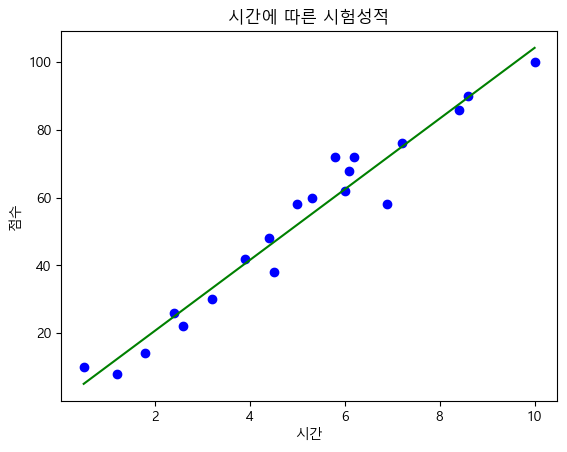

In [8]:
# 선형회귀 시각화
# 데이터를 산점도 그래프로 나타내기
plt.scatter(X,y, color="blue")

# 우리가 예측한 답을 가지고 선그래프 그리기
plt.plot(X,pre, color = 'green')
# 차트 제목
plt.title("시간에 따른 시험성적")
plt.xlabel('시간')
plt.ylabel('점수')
plt.show()

In [9]:
# 9시간 공부 했을 때 예상 점수
lr.predict([[9]])

C:\Users\SeeUSoon\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([93.77478776])

In [24]:
# 평균제곱오차(MSE)
mse = mean_squared_error(y,pre)
mse

33.470959474611576

In [25]:
mse ** 0.5

5.785409188174297

h(x) = w*x + b

In [11]:
# 가중치(weight) / 선형계수 알아보기
# 모델명.coef_
lr.coef_

array([10.44369694])

In [12]:
# 편향(bias)
# 모델명.intercept_
lr.intercept_

-0.21848470286721522

### 경사하강법
- 가중치(w)변화에 따른 비용/손실함수 값의 변화 그래프

h(x) = w*x +b

In [13]:
def h(w,x) : # 가설함수
    return w * x + 0

### 비용/손실 함수
- cost function / loss function

In [14]:
def cost(data, target, weight):
    y_pre = h(weight, data)    
    return ((target-y_pre)**2).mean()

In [15]:
# 입력변수 data와 target의 자료형을 시리즈 형태로 통일
cost(X['hour'],y,10)

38.7

In [16]:
cost(X['hour'],y,12)

112.59200000000006

In [17]:
cost_list = []
for w in range(-100,101) :
    cost_list.append(cost(X['hour'],y,w))
cost_list

[380888.4,
 374020.643,
 367215.372,
 360472.58699999994,
 353792.288,
 347174.475,
 340619.148,
 334126.30700000003,
 327695.95199999993,
 321328.083,
 315022.7,
 308779.803,
 302599.392,
 296481.467,
 290426.028,
 284433.075,
 278502.608,
 272634.627,
 266829.132,
 261086.123,
 255405.6,
 249787.56300000002,
 244232.01200000002,
 238738.94700000001,
 233308.36799999996,
 227940.275,
 222634.668,
 217391.54700000002,
 212210.912,
 207092.76299999998,
 202037.1,
 197043.923,
 192113.232,
 187245.027,
 182439.30800000002,
 177696.075,
 173015.328,
 168397.06699999998,
 163841.292,
 159348.003,
 154917.2,
 150548.88299999997,
 146243.052,
 141999.707,
 137818.84800000003,
 133700.475,
 129644.58799999999,
 125651.187,
 121720.27200000003,
 117851.84300000002,
 114045.9,
 110302.443,
 106621.472,
 103002.987,
 99446.98799999998,
 95953.475,
 92522.448,
 89153.907,
 85847.852,
 82604.283,
 79423.2,
 76304.60299999999,
 73248.492,
 70254.867,
 67323.728,
 64455.075,
 61648.90800000001,
 589

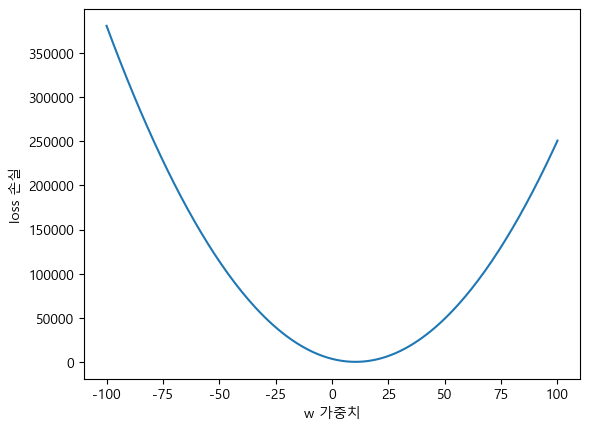

In [18]:
# 마이너스 기호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus']=False

plt.plot(range(-100,101), cost_list)
plt.xlabel('w 가중치')
plt.ylabel('loss 손실')
plt.show()

In [19]:
from sklearn.linear_model import SGDRegressor

In [20]:
#모델생성
sgd_model = SGDRegressor(max_iter = 5000, # w(가중치)업데이트 반복 횟수
                         eta0 = 0.1, # 학습률(learning rate)
                         verbose = 1) # 학습 과정을 확인할 수 있다

In [21]:
# 학습
sgd_model.fit(X,y)

-- Epoch 1
Norm: 5.84, NNZs: 1, Bias: -23.306032, T: 20, Avg. loss: 6277.556756
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 15.20, NNZs: 1, Bias: -20.327514, T: 40, Avg. loss: 5002.273678
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 7.12, NNZs: 1, Bias: -18.019261, T: 60, Avg. loss: 231.443806
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 11.01, NNZs: 1, Bias: -15.050972, T: 80, Avg. loss: 114.964003
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.61, NNZs: 1, Bias: -12.790453, T: 100, Avg. loss: 117.835892
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.51, NNZs: 1, Bias: -10.378893, T: 120, Avg. loss: 105.472875
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 8.27, NNZs: 1, Bias: -9.126510, T: 140, Avg. loss: 116.158384
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 7.78, NNZs: 1, Bias: -7.929974, T: 160, Avg. loss: 57.196098
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 10.12, NNZs: 1, Bias: -7.077904, T: 180, Avg. loss: 81.475384
Tot

SGDRegressor(eta0=0.1, max_iter=5000, verbose=1)

In [22]:
# 예측
sgd_model.predict([[7]])

C:\Users\SeeUSoon\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  warnings.warn(


array([69.14612187])

In [23]:
# w 값 확인 (모델명.coef_)
# b 값 확인 (모델명.intercept)
print(sgd_model.coef_)
print(sgd_model.intercept_)

[10.15904508]
[-1.96719371]
